<a href="https://colab.research.google.com/github/YashasKamath/Airbnb-clone/blob/main/colab-workspace_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To show that if there is cuda tookit installed
!ls /usr/local

bin    cuda	cuda-11.8  games	       include	lib64	   man	 share
colab  cuda-11	etc	   _gcs_config_ops.so  lib	licensing  sbin  src


In [ ]:
# To show that if we have the nvcc command
!which nvcc

/usr/local/cuda/bin/nvcc


In [ ]:
# To show the property of the nvidia card(On my one, I use the K80)
!nvidia-smi

Sat Apr 29 10:07:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Download Image

In [ ]:
!wget https://raw.githubusercontent.com/SBhat2615/pcap-mini-project/main/image.jpg

--2023-04-29 10:07:15--  https://raw.githubusercontent.com/SBhat2615/pcap-mini-project/main/image.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8352 (8.2K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   8.16K  --.-KB/s    in 0s      

2023-04-29 10:07:15 (95.6 MB/s) - ‘image.jpg’ saved [8352/8352]



In [ ]:
!ls -l

total 16
-rw-r--r-- 1 root root 8352 Apr 29 10:07 image.jpg
drwxr-xr-x 1 root root 4096 Apr 27 13:35 sample_data


In [ ]:
!pwd

/content


**RUN THE BELOW 2 CELLS ONLY IF YOU HAVE RGB IMAGE UPLOADED**



# Image to GrayScale

array([[219, 221, 232, ..., 189, 205, 218],
       [209, 208, 218, ..., 201, 215, 226],
       [204, 200, 209, ..., 213, 223, 230],
       ...,
       [253, 253, 253, ...,  35,  34,  32],
       [254, 254, 254, ...,  31,  32,  34],
       [254, 254, 254, ...,  31,  32,  34]], dtype=uint8)
(170, 115)


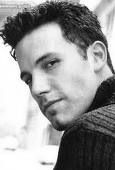

In [ ]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from pprint import pprint

img = cv2.imread('./image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pprint(img)

print(img.shape)

# plt.imshow(img)
# plt.axis("off")
# plt.show()
cv2_imshow(img)

Storing in txt

In [ ]:
with open("image_text.txt", "w") as f:
    for i in img:
        for j in i:
            f.write(str(j)+" ")
        f.write("\n")

# Load Image

In [ ]:
%%writefile loadImg.c
#include <stdio.h>
#include <stdlib.h>

// Define Image Height & Width
#define IMG_WIDTH 512
#define IMG_HEIGHT 512

int main() {
    FILE *fp;
    char *filename = "./image_text.txt";
    unsigned char img[IMG_HEIGHT][IMG_WIDTH];
    int i, j;

    // Open image file
    if ((fp = fopen(filename, "rb")) == NULL) {
        printf("Error: Image file not found\n");
        return 1;
    }

    // Skip image header
    //fseek(fp, 8, SEEK_SET);

    // Read image pixel values
    for (i = 0; i < IMG_HEIGHT; i++) {
        for (j = 0; j < IMG_WIDTH; j++) {
            img[i][j] = fgetc(fp);
        }
    }

    // Close image file
    fclose(fp);

    // Print image data255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

    /*
    for (i = 0; i < IMG_HEIGHT; i++) {
        for (j = 0; j < IMG_WIDTH; j++) {
            printf("%u ", img[i][j]);
        }
        printf("\n");
    }
    */
    printf("Image Width : %d\n", IMG_WIDTH);
    printf("Image Height : %d\n", IMG_HEIGHT);

    printf("Image Matrix:\n");
    for (i = 0; i < 25; i++) {
        for (j = 0; j < 25; j++) {
            printf("%u ", img[i][j]);
        }
        printf("\n");
    }

    return 0;
}


Writing loadImg.c


In [ ]:
%%writefile load_img.cu
#include <stdio.h>
#include <stdlib.h>

#define MAX_ROWS 170
#define MAX_COLS 115

int main() {
    FILE* file = fopen("image_text.txt", "r");
    int matrix[MAX_ROWS][MAX_COLS];
    int num_rows = 0;
    int num_cols = 0;

    if (file == NULL) {
        printf("Error: could not open file.\n");
        return 1;
    }

    // Read the contents of the file
    while (!feof(file) && num_rows < MAX_ROWS) {
        for (num_cols = 0; num_cols < MAX_COLS && !feof(file); num_cols++) {
            fscanf(file, "%d", &matrix[num_rows][num_cols]);
        }
        num_rows++;
    }

    // Print the contents of the matrix
    for (int i = 0; i < num_rows; i++) {
        for (int j = 0; j < num_cols; j++) {
            printf("%d ", matrix[i][j]);
        }
        printf("\n");
    }

    fclose(file);
    return 0;
}


Writing load_img.c


In [ ]:
!gcc loadImg.c

In [ ]:
!gcc load_img.c
!./a.out

219 221 232 235 228 235 243 237 240 243 242 234 230 233 238 239 230 247 247 241 248 250 249 247 246 250 250 248 241 246 251 240 247 246 246 247 251 252 253 248 245 253 234 254 243 236 205 170 201 247 208 154 197 182 226 164 195 180 153 181 171 187 196 191 184 156 133 154 197 203 185 180 189 175 176 189 183 166 175 202 237 247 246 253 250 253 247 253 252 253 253 253 254 254 253 252 252 244 242 245 233 205 183 176 175 176 173 164 156 158 169 180 189 205 218 
209 208 218 221 214 219 227 222 217 221 221 218 217 221 222 221 239 233 229 232 233 223 223 238 236 231 233 242 235 227 230 228 237 236 250 252 250 245 251 251 252 223 253 242 252 228 127 101 140 201 154 122 133 145 170 118 215 156 156 236 169 136 139 145 145 151 149 160 171 146 126 143 167 185 190 180 178 189 192 183 253 253 248 237 248 254 254 246 251 252 253 253 253 254 253 252 251 250 246 237 218 194 178 174 172 175 176 170 164 165 173 182 201 215 226 
204 200 209 215 209 215 223 220 218 221 223 222 224 226 223 218 223 220 221 22

# Richardson-Lucy Algorithm

In [ ]:
%%writefile final.cu
#include <stdio.h>
#include <stdlib.h>

#define MAX_ROWS 170
#define MAX_COLS 115

#define PIX 115

#define H 6
#define NUM 115 * 115
#define SIGMA 25

/*READING THE DATA*/
void dataread(float * y) {
    int i;
    FILE * fp;
    fp = fopen("mylenna", "r");
    for (i = 0; i < NUM; i++) {
        fscanf(fp, "%f ", & y[i]);
    }
    return;
}

void spread(float * p) {
    int i, j;
    float temp = 0;
    for (i = -H; i <= H; i++) {
        for (j = -H; j <= H; j++) {
            p[i * i + j * j] = exp(-((float)(i * i + j * j)) / SIGMA);
            temp += p[i * i + j * j];
        }
    }
    for (i = -H; i <= H; i++)
        for (j = -H; j <= H; j++)
            p[i * i + j * j] = p[i * i + j * j] / temp;
    return;
}

__device__ int distance(int i, int j, int k, int l) {
    int d;
    d = (i - k) * (i - k) + (j - l) * (j - l);
    return d;
}

/*RENEW THE VALUE OF LAMBDA VECTOR*/
void renew(float * lold, float * lnew) {
    int i;
    for (i = 0; i < NUM; i++)
        lold[i] = lnew[i];
    return;
}

/*SAVING THE DATA*/
void datasave(float * l) {
    int i, j;
    FILE * fp;
    fp = fopen("mylenn", "w");
    for (i = 0; i < PIX; i++) {
        for (j = 0; j < PIX; j++) {
            fprintf(fp, "%f ", l[i * PIX + j]);
        }
        fprintf(fp, "\n");
    }
    return;
}

__global__ void lambda(float *y, float *lold, float *lnew, float *p) {
    int i1=blockIdx.y;
    int i2=blockIdx.x;

    int tmp=0;
    for (int j1 = max(0, i1 - H + 1); j1 < min(i1 + H - 1, PIX); j1++) {
        for (int j2 = max(0, i2 - H + 1); j2 < min(i2 + H - 1, PIX); j2++) {
            int temp = 0;
            for (int k1 = max(0, i1 - H + 1); k1 < min(i1 + H - 1, PIX); k1++) {
                for (int k2 = max(0, i2 - H + 1); k2 < min(i2 + H - 1, PIX); k2++) {
                    temp = temp + lold[k1 * PIX + k2] * p[distance(j1, j2, k1, k2)];
                }
                tmp = tmp + y[j1 * PIX + j2] * (p[distance(j1, j2, i1, i2)]) / temp;
            }
        }
        lnew[i1 * PIX + i2] = lold[i1 * PIX + i2] * tmp;
    }
}

int main() {
    
    FILE* file = fopen("image_text.txt", "r");
    int y[MAX_ROWS][MAX_COLS];
    int num_rows = 0;
    int num_cols = 0;

    if (file == NULL) {
        printf("Error: could not open file.\n");
        return 1;
    }

    // Read the contents of the file
    while (!feof(file) && num_rows < MAX_ROWS) {
        for (num_cols = 0; num_cols < MAX_COLS && !feof(file); num_cols++) {
            fscanf(file, "%d", &matrix[num_rows][num_cols]);
        }
        num_rows++;
    }

    // Print the contents of the matrix
    for (int i = 0; i < num_rows; i++) {
        for (int j = 0; j < num_cols; j++) {
            //printf("%d ", matrix[i][j]);
        }
        //printf("\n");
    }
    

    int i;
    float *y, *lold, *lnew, *p;

    y = (float*)malloc(NUM * sizeof(float));
    lold = (float*)malloc(NUM * sizeof(float));
    lnew = (float*)malloc(NUM * sizeof(float));

    p = (float*)malloc((2 * (H + 1) * (H + 1)) * sizeof(float));
    printf("Result1:\n");
    spread(p);
    
    dataread(lold);
    printf("Result2:\n");
    float *d_y, * d_lold, *d_lnew, *d_p;

    cudaMalloc((void**)&d_y, NUM * sizeof(float));
    cudaMalloc((void**)&d_lold, NUM * sizeof(float));
    cudaMalloc((void**)&d_lnew, NUM * sizeof(float));
    cudaMalloc((void**)&d_p, NUM * sizeof(float));

    cudaMemcpy(d_y, &y, NUM * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_lold, &lold, NUM * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_lnew, &lnew, NUM * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_p, &p, NUM * sizeof(float), cudaMemcpyHostToDevice);

    dim3 grid(PIX, PIX, 1);

    printf("Result:\n");

    for (i = 0; i < 1; i++) {
        lambda<<<grid, 1>>>(y, lold, lnew, p);

        cudaMemcpy(lnew, d_lnew, NUM * sizeof(float), cudaMemcpyDeviceToHost);

        renew(lold, lnew);
        printf("%d \n", i);
    }

    //datasave(lnew);
    printf("Result:\n");
    for (int i = 0; i < num_rows; i++) {
        for (int j = 0; j < num_cols; j++) {
            printf("%f ", lnew[i*num_cols+j]);
        }
        printf("\n");
    }

    free(p);
    free(y);
    free(lnew);
    free(lold);

    fclose(file);
    return 0;
}


Overwriting final.cu


In [ ]:
!nvcc final.cu

In [ ]:
!./a.out

Result1:


In [ ]:
% % writefile trial1.cu
#include <stdio.h>

#include <math.h>

#include <stdlib.h>

#define H 6
#define PIX 248
#define NUM 248 * 248
#define SIGMA 25
#ifndef max
#define max(a, b)(((a) > (b)) ? (a) : (b))
#endif
#ifndef min
#define min(a, b)(((a) < (b)) ? (a) : (b))
#endif

void dataread(float * y);
int distance(int i, int j, int k, int l);
void lambda(float * y, float * lold, float * lnew, float * p);
void renew(float * lold, float * lnew);
void spread(float * p);
void datasave(float * l);
int main(void) {
    int i;
    float * y, * lold, * lnew, * p, ttt;
    y = malloc(NUM * sizeof(float));
    lold = malloc(NUM * sizeof(float));
    lnew = malloc(NUM * sizeof(float));
    p = malloc((2 * (H + 1) * (H + 1)) * sizeof(float));
    spread(p);
    dataread(y);
    dataread(lold);
    for (i = 0; i < 40; i++) {
        lambda(y, lold, lnew, p);
        renew(lold, lnew);
        printf("%d \n", i);
    }
    datasave(lnew);
    free(p);
    free(y);
    free(lnew);
    free(lold);
    return 0;
}
/*READING THE DATA*/
void dataread(float * y) {
    int i;
    FILE * fp;
    fp = fopen("mylenna", "r");
    for (i = 0; i < NUM; i++) {
        fscanf(fp, "%f ", & y[i]);
    }
    return;
}
/*DEFINING A NORM*/
int distance(int i, int j, int k, int l) {
    int d;
    d = (i - k) * (i - k) + (j - l) * (j - l);
    return d;
}
/*LAMBDA VECTOR*/
void lambda(float * y, float * lold, float * lnew, float * p) {
        int i1, i2, j1, j2, k1, k2;
        float temp, tmp;
        for (i1 = 0; i1 < PIX; i1++) {
            for (i2 = 0; i2 < PIX; i2++) {
                tmp = 0;
                for (j1 = max(0, i1 - H + 1); j1 < min(i1 + H - 1, PIX); j1++) {
                    for (j2 = max(0, i2 - H + 1); j2 < min(i2 + H - 1, PIX); j2++) {
                        temp = 0;
                        for (k1 = max(0, i1 - H + 1); k1 < min(i1 + H - 1, PIX); k1++) {
                            for (k2 = max(0, i2 - H + 1); k2 < min(i2 + H - 1, PIX); k2++) {
                                temp = temp + lold[k1 * PIX + k2] * p[distance(j1, j2, k1, k2)];
                            }
                            tmp = tmp + y[j1 * PIX + j2] * (p[distance(j1, j2, i1, i2)]) / temp;
                        }
                    }
                    lnew[i1 * PIX + i2] = lold[i1 * PIX + i2] * tmp;
                }
            }
            return;
        }
        colab - workspace.ipynb
        /*Point Spread Function*/
        void spread(float * p) {
            int i, j;
            float temp = 0;
            for (i = -H; i <= H; i++) {
                for (j = -H; j <= H; j++) {
                    p[i * i + j * j] = exp(-((float)(i * i + j * j)) / SIGMA);
                    temp += p[i * i + j * j];
                }
            }
            for (i = -H; i <= H; i++)
                for (j = -H; j <= H; j++)
                    p[i * i + j * j] = p[i * i + j * j] / temp;
            return;
        }
        /*RENEW THE VALUE OF LAMBDA VECTOR*/
        void renew(float * lold, float * lnew) {
            int i;
            for (i = 0; i < NUM; i++)
                lold[i] = lnew[i];
            return;
        }
        /*SAVING THE DATA*/
        void datasave(float * l) {
            int i, j;
            FILE * fp;
            fp = fopen("mylenn", "w");
            for (i = 0; i < PIX; i++) {
                for (j = 0; j < PIX; j++) {
                    fprintf(fp, "%f ", l[i * PIX + j]);
                }
                fprintf(fp, "\n");
            }
            return;
        }

Writing trial1.cu


In [ ]:
!nvcc -arch=sm_37 -gencode=arch=compute_37,code=sm_37 l9q1a.cu -o l9q1a

nvcc warning : The 'compute_35', 'compute_37', 'sm_35', and 'sm_37' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
gcc: error: l9q1a.cu: No such file or directory
gcc: warning: ‘-x c++’ after last input file has no effect
gcc: fatal error: no input files
compilation terminated.


In [ ]:
!./l9q1a

/bin/bash: ./l9q1a: No such file or directory


In [ ]:
%%writefile final.cu
#include <stdio.h>
#include <stdlib.h>

#define MAX_ROWS 115
#define MAX_COLS 115

#define PIX 115

#define H 6
#define NUM 115 * 115
#define SIGMA 25

/*READING THE DATA*/
void dataread(float * y) {
    int i;
    FILE * fp;
    fp = fopen("mylenna", "r");
    for (i = 0; i < NUM; i++) {
        fscanf(fp, "%f ", & y[i]);
    }
    return;
}

void spread(float * p) {
    int i, j;
    float temp = 0;
    for (i = -H; i <= H; i++) {
        for (j = -H; j <= H; j++) {
            p[i * i + j * j] = exp(-((float)(i * i + j * j)) / SIGMA);
            temp += p[i * i + j * j];
        }
    }
    for (i = -H; i <= H; i++)
        for (j = -H; j <= H; j++)
            p[i * i + j * j] = p[i * i + j * j] / temp;
    return;
}

__device__ int distance(int i, int j, int k, int l) {
    int d;
    d = (i - k) * (i - k) + (j - l) * (j - l);
    return d;
}

/*RENEW THE VALUE OF LAMBDA VECTOR*/
void renew(float * lold, float * lnew) {
    int i;
    for (i = 0; i < NUM; i++)
        lold[i] = lnew[i];
    return;
}

/*SAVING THE DATA*/
void datasave(float * l) {
    int i, j;
    FILE * fp;
    fp = fopen("mylenn", "w");
    for (i = 0; i < PIX; i++) {
        for (j = 0; j < PIX; j++) {
            fprintf(fp, "%f ", l[i * PIX + j]);
        }
        fprintf(fp, "\n");
    }
    return;
}

__global__ void lambda(float *y, float *lold, float *lnew, float *p) {
    int i1=blockIdx.y;
    int i2=blockIdx.x;

    int tmp=0;
    for (int j1 = max(0, i1 - H + 1); j1 < min(i1 + H - 1, PIX); j1++) {
        for (int j2 = max(0, i2 - H + 1); j2 < min(i2 + H - 1, PIX); j2++) {
            int temp = 0;
            for (int k1 = max(0, i1 - H + 1); k1 < min(i1 + H - 1, PIX); k1++) {
                for (int k2 = max(0, i2 - H + 1); k2 < min(i2 + H - 1, PIX); k2++) {
                    temp = temp + lold[k1 * PIX + k2] * p[distance(j1, j2, k1, k2)];
                }
                tmp = tmp + y[j1 * PIX + j2] * (p[distance(j1, j2, i1, i2)]) / temp;
            }
        }
        lnew[i1 * PIX + i2] = lold[i1 * PIX + i2] * tmp;
    }
}

int main() {
    
    FILE* file = fopen("image_text.txt", "r");
    int img[MAX_ROWS][MAX_COLS];
    int num_rows = 0;
    int num_cols = 0;

    if (file == NULL) {
        printf("Error: could not open file.\n");
        return 1;
    }

    // Read the contents of the file
    while (!feof(file) && num_rows < MAX_ROWS) {
        for (num_cols = 0; num_cols < MAX_COLS && !feof(file); num_cols++) {
            fscanf(file, "%d", &img[num_rows][num_cols]);
        }
        num_rows++;
    }

    

    int i;
    float *y, *lold, *lnew, *p;

    y = (float*)malloc(NUM * sizeof(float));
    lold = (float*)malloc(NUM * sizeof(float));
    lnew = (float*)malloc(NUM * sizeof(float));

    p = (float*)malloc((2 * (H + 1) * (H + 1)) * sizeof(float));
    printf("Result1:\n");
    spread(p);
    
    dataread(lold);
    printf("Result2:\n");
    float *d_y, * d_lold, *d_lnew, *d_p;

    cudaMalloc((void**)&d_y, NUM * sizeof(float));
    cudaMalloc((void**)&d_lold, NUM * sizeof(float));
    cudaMalloc((void**)&d_lnew, NUM * sizeof(float));
    cudaMalloc((void**)&d_p, NUM * sizeof(float));

    cudaMemcpy(d_y, &y, NUM * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_lold, &lold, NUM * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_lnew, &lnew, NUM * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_p, &p, NUM * sizeof(float), cudaMemcpyHostToDevice);

    dim3 grid(PIX, PIX, 1);

    printf("Result:\n");

    for (i = 0; i < 1; i++) {
        lambda<<<grid, 1>>>(d_y, d_lold, d_lnew, d_p);

        cudaMemcpy(&lold, d_lnew, NUM * sizeof(float), cudaMemcpyDeviceToHost);
        printf("%d \n", i);
    }

    //datasave(lnew);
    printf("Result:\n");
    for (int i = 0; i < num_rows; i++) {
        for (int j = 0; j < num_cols; j++) {
            printf("%f ", lnew[i*num_cols+j]);
        }
        printf("\n");
    }

    free(p);
    free(y);
    free(lnew);
    free(lold);

    fclose(file);
    return 0;
}
